In [1]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length','sepal_width','petal_length','petal_width','species']
iris=pd.read_csv(url,header=None,names=col_names)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size']=14
from matplotlib.colors import ListedColormap
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [4]:
iris['species_num']=iris.species.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

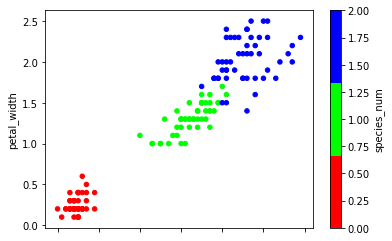

In [5]:
iris.plot(kind='scatter',x='petal_length',y='petal_width',c='species_num',colormap=cmap_bold)

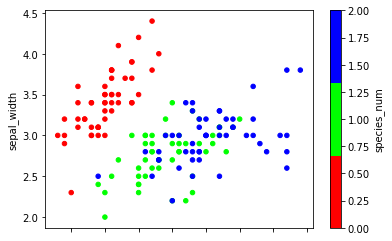

In [6]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width',c='species_num',colormap=cmap_bold)

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
feature_cols=['sepal_length','sepal_width','petal_length','petal_width']
x=iris[feature_cols]

In [9]:
x=iris.drop(['species','species_num'],axis=1)
x=iris.loc[:,'sepal_length':'petal_width']
x=iris.iloc[:,0:4]

In [10]:
y=iris.species_num

In [11]:
print(type(x))
print(type(x.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [12]:
print(type(y))
print(type(y.values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [13]:
print (x.shape)

(150, 4)


In [14]:
print (y.shape)

(150,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn=KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [17]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
knn.predict([[3,5,4,2]])

array([2], dtype=int64)

In [19]:
x_new=[[3,5,4,2],[5,4,3,2]]
knn.predict(x_new)

array([2, 1], dtype=int64)

In [20]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
knn.predict(x_new)

array([1, 1], dtype=int64)

In [21]:
knn.predict_proba(x_new)

array([[0. , 0.8, 0.2],
       [0. , 1. , 0. ]])